In [ ]:
# heart_model_training.py

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import pickle

# Step 1: Load Dataset
df = pd.read_csv("heart.csv")  # Make sure this file is in your directory

# Step 2: Explore the data (optional)
print(df.head())
print(df.info())

# Step 3: Split Features and Target
X = df.drop('target', axis=1)
y = df['target']

# Step 4: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Model Training
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 6: Predictions and Evaluation
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Step 7: Save the model
with open('model/heart_model.pkl', 'wb') as f:
    pickle.dump(model, f)

print("✅ Model saved to model/heart_model.pkl")


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import pickle

In [ ]:
df = pd.read_csv("heart.csv")

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
X = df.drop('target', axis=1)
y = df['target']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9853658536585366

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



In [ ]:
import pickle

# Assume 'model' is your trained RandomForestClassifier or any other model
# Example: model = RandomForestClassifier().fit(X_train, y_train)

# Create a folder called 'model' if not already present
import os
os.makedirs("model", exist_ok=True)

# Save the model to a .pkl file
with open('model/heart.pkl', 'wb') as f:
    pickle.dump(model, f)

print("✅ Model saved successfully to model/heart_model.pkl")


✅ Model saved successfully to model/heart_model.pkl


In [ ]:
import numpy as np
import pickle

# Load the trained model
with open('model/heart_model.pkl', 'rb') as f:
    model = pickle.load(f)

# Example input with 13 features (as per order above)
example_input = np.array([[63, 1, 3, 145, 233, 1, 0, 150, 0, 2.3, 0, 0, 1]])

# Predict
prediction = model.predict(example_input)[0]
probability = model.predict_proba(example_input)[0]

# Display result
print(f"✅ Predicted Class: {prediction} (1 = Risk, 0 = No Risk)")
print(f"🔍 Prediction Probabilities: {probability}")


c:\Users\Bhuvansai\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


ValueError: X has 13 features, but RandomForestClassifier is expecting 7 features as input.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import pickle
import os

# Load the dataset
df = pd.read_csv("heart.csv")

# Select top 7 user-input features
selected_features = ['age', 'sex', 'cp', 'thalach', 'oldpeak', 'slope', 'ca']
X = df[selected_features]
y = df['target']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate model
y_pred = model.predict(X_test)
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))

# Save model
os.makedirs("model", exist_ok=True)
with open("model/heart_model_7features.pkl", "wb") as f:
    pickle.dump(model, f)

print("📁 Model saved to model/heart_model_7features.pkl")


✅ Accuracy: 0.9853658536585366

📊 Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205

📁 Model saved to model/heart_model_7features.pkl


In [ ]:
import numpy as np
import pickle

# Load the trained model
with open('model/heart_model_7features.pkl', 'rb') as f:
    model = pickle.load(f)

# Example input with 13 features (as per order above)
example_input = np.array([[20, 1, 3, 145, 233, 1, 0]])

# Predict
prediction = model.predict(example_input)[0]
probability = model.predict_proba(example_input)[0]

# Display result
print(f"✅ Predicted Class: {prediction} (1 = Risk, 0 = No Risk)")
print(f"🔍 Prediction Probabilities: {probability}")


✅ Predicted Class: 0 (1 = Risk, 0 = No Risk)
🔍 Prediction Probabilities: [0.73 0.27]


c:\Users\Bhuvansai\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\Bhuvansai\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


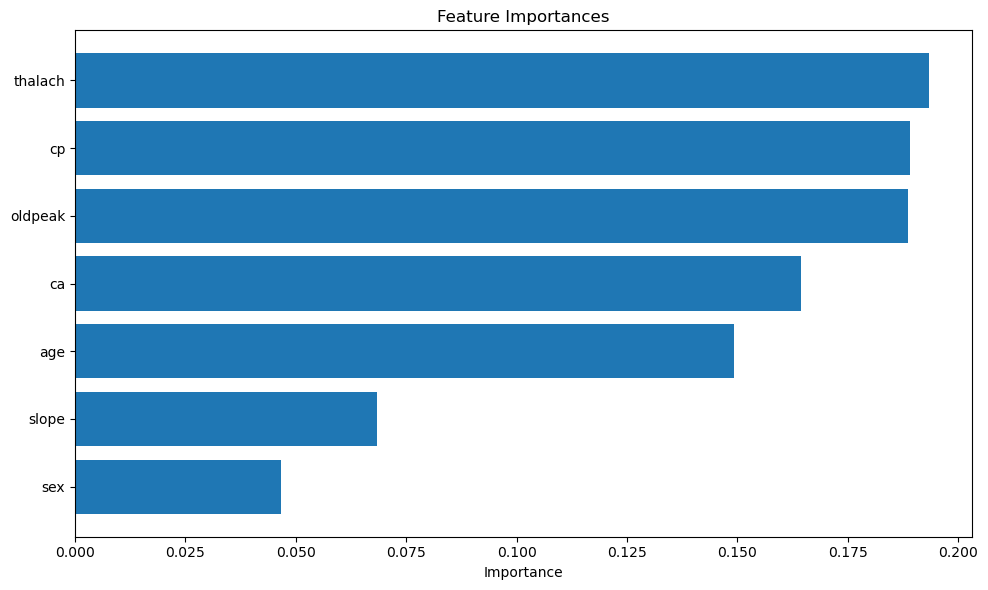

In [ ]:
import matplotlib.pyplot as plt

importances = model.feature_importances_
features = X.columns
indices = np.argsort(importances)

plt.figure(figsize=(10,6))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], align="center")
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel("Importance")
plt.tight_layout()
plt.show()
